In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
auto = pd.read_csv('auto.csv')

## Simple Linear Regression Model

In [3]:
auto.head(10)

,symboling,normalized losses,make,fuel type,aspiration,doors,style,wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
auto.columns

Index(['symboling', 'normalized losses', 'make', 'fuel type', 'aspiration',
       'doors', 'style', 'wheels', 'engine location', 'wheel base', 'length',
       'width', 'height', 'curb weight', 'engine type', 'cylinders',
       'engine size', 'fuel system', 'bore', 'stroke', 'compression ratio',
       'horsepower', 'peak rpm', 'city mpg', 'highway mpg', 'price'],
      dtype='object')

In [5]:
auto.drop(['symboling', 'normalized losses'], axis=1,inplace=True)

In [6]:
auto.head(10)

,make,fuel type,aspiration,doors,style,wheels,engine location,wheel base,length,width,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [8]:
auto.columns

Index(['make', 'fuel type', 'aspiration', 'doors', 'style', 'wheels',
       'engine location', 'wheel base', 'length', 'width', 'height',
       'curb weight', 'engine type', 'cylinders', 'engine size', 'fuel system',
       'bore', 'stroke', 'compression ratio', 'horsepower', 'peak rpm',
       'city mpg', 'highway mpg', 'price'],
      dtype='object')

In [7]:
auto['fuel type'].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
auto['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [11]:
auto_1 = auto[['horsepower', 'price']]

In [15]:
auto_1.replace('?', np.nan,inplace=True)

/var/folders/jr/pfy34jh93sb8cn2hnjc2k73w0000gn/T/ipykernel_33641/921823357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_1.replace('?', np.nan,inplace=True)


In [18]:
auto_1.dtypes

horsepower    object
price         object
dtype: object

In [17]:
auto_1['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [19]:
auto_1['price'] = auto_1['price'].astype('float64')
auto_1['horsepower'] = auto_1['horsepower'].astype('float64')

/var/folders/jr/pfy34jh93sb8cn2hnjc2k73w0000gn/T/ipykernel_33641/964730396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_1['price'] = auto_1['price'].astype('float64')
/var/folders/jr/pfy34jh93sb8cn2hnjc2k73w0000gn/T/ipykernel_33641/964730396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_1['horsepower'] = auto_1['horsepower'].astype('float64')


In [ ]:
auto[['horsepower', 'price']]

In [20]:
auto_1.dtypes

horsepower    float64
price         float64
dtype: object

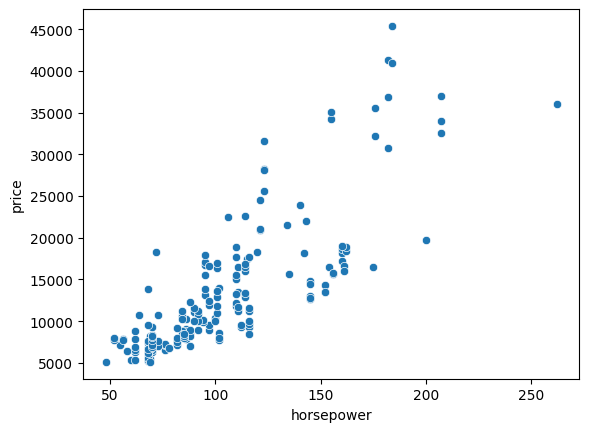

In [21]:
sns.scatterplot(x=auto_1['horsepower'], y=auto_1['price'])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
auto_1 = auto_1.dropna().reset_index()

In [50]:
x = np.array(auto_1['horsepower']).reshape(-1, 1)
y = np.array(auto_1['price'])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [52]:
reg = LinearRegression()

In [53]:
reg_fit_main = reg.fit(x_train, y_train)

In [54]:
reg.coef_

array([165.72283756])

In [55]:
reg.intercept_

-3784.5529555159083

In [56]:
reg_fit_main.coef_

array([165.72283756])

In [59]:
r_square = reg_fit_main.score(x_train, y_train)


In [60]:
print(r_square)

0.5678540641421728


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
y_predicted = reg_fit_main.predict(x_test)

In [70]:
output_df = pd.DataFrame(list(zip(y_test, y_predicted,abs(y_test- y_predicted))), columns=['y_actua','y_predicted' , 'abs_error'])

In [11]:
a = [1,2,3]
b = ['a','b', 'c']

list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [13]:
pd.DataFrame(data=list(zip(a,b)), columns=['Col1', 'Col2'])

,Col1,Col2
0,1,a
1,2,b
2,3,c


In [71]:
output_df.head()

,y_actua,y_predicted,abs_error
0,7898.0,5495.925948,2402.074052
1,36000.0,39634.830485,3634.830485
2,45400.0,26708.449155,18691.550845
3,6229.0,7484.599998,1255.599998
4,32528.0,30520.074419,2007.925581


In [75]:
output_df['abs_error'].sum()/50

3361.1827127076253

In [74]:
output_df.shape[0]

50

In [77]:
mean_absolute_error(y_test, y_predicted)

3361.1827127076253

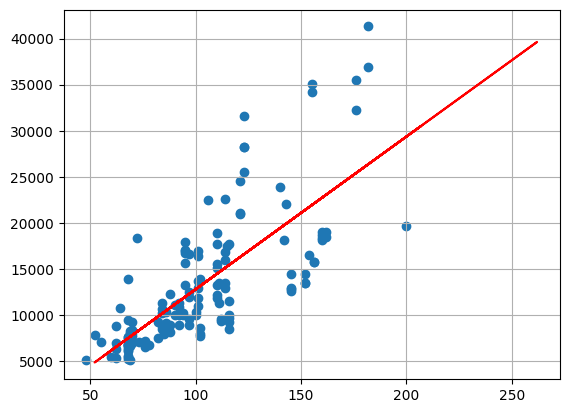

In [81]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_predicted, 'r')
plt.grid(True)
plt.show()

## Multiple Linear Regression Model

In [19]:
auto.head(10)

,symboling,normalized losses,make,fuel type,aspiration,doors,style,wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


### EDA & Pre-Processing

In [16]:
auto.replace('?', 0,inplace=True)
auto.drop(['normalized losses'], axis=1,inplace=True)

df_car_new = auto.copy(deep=True)

df_car_new['fuel type'] = df_car_new['fuel type'].map({'gas':1, 'diesel':0})
df_car_new['aspiration'] = df_car_new['aspiration'].map({'std':1, 'turbo':0})
df_car_new['doors'] = df_car_new['doors'].map({'four':1, 'two':0})

In [17]:
def getDummies(df, category_cols):
    for col in category_cols:
        dummy_df = pd.get_dummies(df[col], drop_first=True, dtype='int')
        new_col_map = {c: f"{col}({c})" for c in dummy_df.columns}
        dummy_df.rename(columns=new_col_map,inplace=True)
        df = pd.concat([df,dummy_df],axis=1)
    df.drop(category_cols,axis=1,inplace=True)
    return df

In [18]:
encode_cols = ['make', 'fuel system', 'cylinders', 'engine type', 'symboling', 'wheels', 'style']
df_car_1 = getDummies(df=df_car_new, category_cols=encode_cols)

df_car_1['price'] = df_car_new['price'].copy(deep=True)
df_car_1['engine location'] = df_car_1['engine location'].map({'front':1, 'rear':0})

for col in df_car_1.select_dtypes('object').columns:
    df_car_1[col] = df_car_1[col].astype(float)

In [7]:
df_car_1

,fuel type,aspiration,doors,engine location,wheel base,length,width,height,curb weight,engine size,...,symboling(0),symboling(1),symboling(2),symboling(3),wheels(fwd),wheels(rwd),style(hardtop),style(hatchback),style(sedan),style(wagon)
0,1,1,0.0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,1,0,0,0,0
1,1,1,0.0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,1,0,0,0,0
2,1,1,0.0,1,94.5,171.2,65.5,52.4,2823,152,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1.0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1.0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,1.0,1,109.1,188.8,68.9,55.5,2952,141,...,0,0,0,0,0,1,0,0,1,0
201,1,0,1.0,1,109.1,188.8,68.8,55.5,3049,141,...,0,0,0,0,0,1,0,0,1,0
202,1,1,1.0,1,109.1,188.8,68.9,55.5,3012,173,...,0,0,0,0,0,1,0,0,1,0
203,0,0,1.0,1,109.1,188.8,68.9,55.5,3217,145,...,0,0,0,0,0,1,0,0,1,0


In [19]:
df_car_1.columns

Index(['fuel type', 'aspiration', 'doors', 'engine location', 'wheel base',
       'length', 'width', 'height', 'curb weight', 'engine size', 'bore',
       'stroke', 'compression ratio', 'horsepower', 'peak rpm', 'city mpg',
       'highway mpg', 'price', 'make(audi)', 'make(bmw)', 'make(chevrolet)',
       'make(dodge)', 'make(honda)', 'make(isuzu)', 'make(jaguar)',
       'make(mazda)', 'make(mercedes-benz)', 'make(mercury)',
       'make(mitsubishi)', 'make(nissan)', 'make(peugot)', 'make(plymouth)',
       'make(porsche)', 'make(renault)', 'make(saab)', 'make(subaru)',
       'make(toyota)', 'make(volkswagen)', 'make(volvo)', 'fuel system(2bbl)',
       'fuel system(4bbl)', 'fuel system(idi)', 'fuel system(mfi)',
       'fuel system(mpfi)', 'fuel system(spdi)', 'fuel system(spfi)',
       'cylinders(five)', 'cylinders(four)', 'cylinders(six)',
       'cylinders(three)', 'cylinders(twelve)', 'cylinders(two)',
       'engine type(dohcv)', 'engine type(l)', 'engine type(ohc)',
      

In [8]:
num_vars = ['wheel base',
       'length', 'width', 'height', 'curb weight', 
       'engine size', 'bore',
       'stroke', 'compression ratio', 
       'horsepower', 'peak rpm', 'city mpg',
       'highway mpg', 'price']

In [9]:
df_car_1[num_vars]

,wheel base,length,width,height,curb weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<Figure size 1600x1600 with 0 Axes>

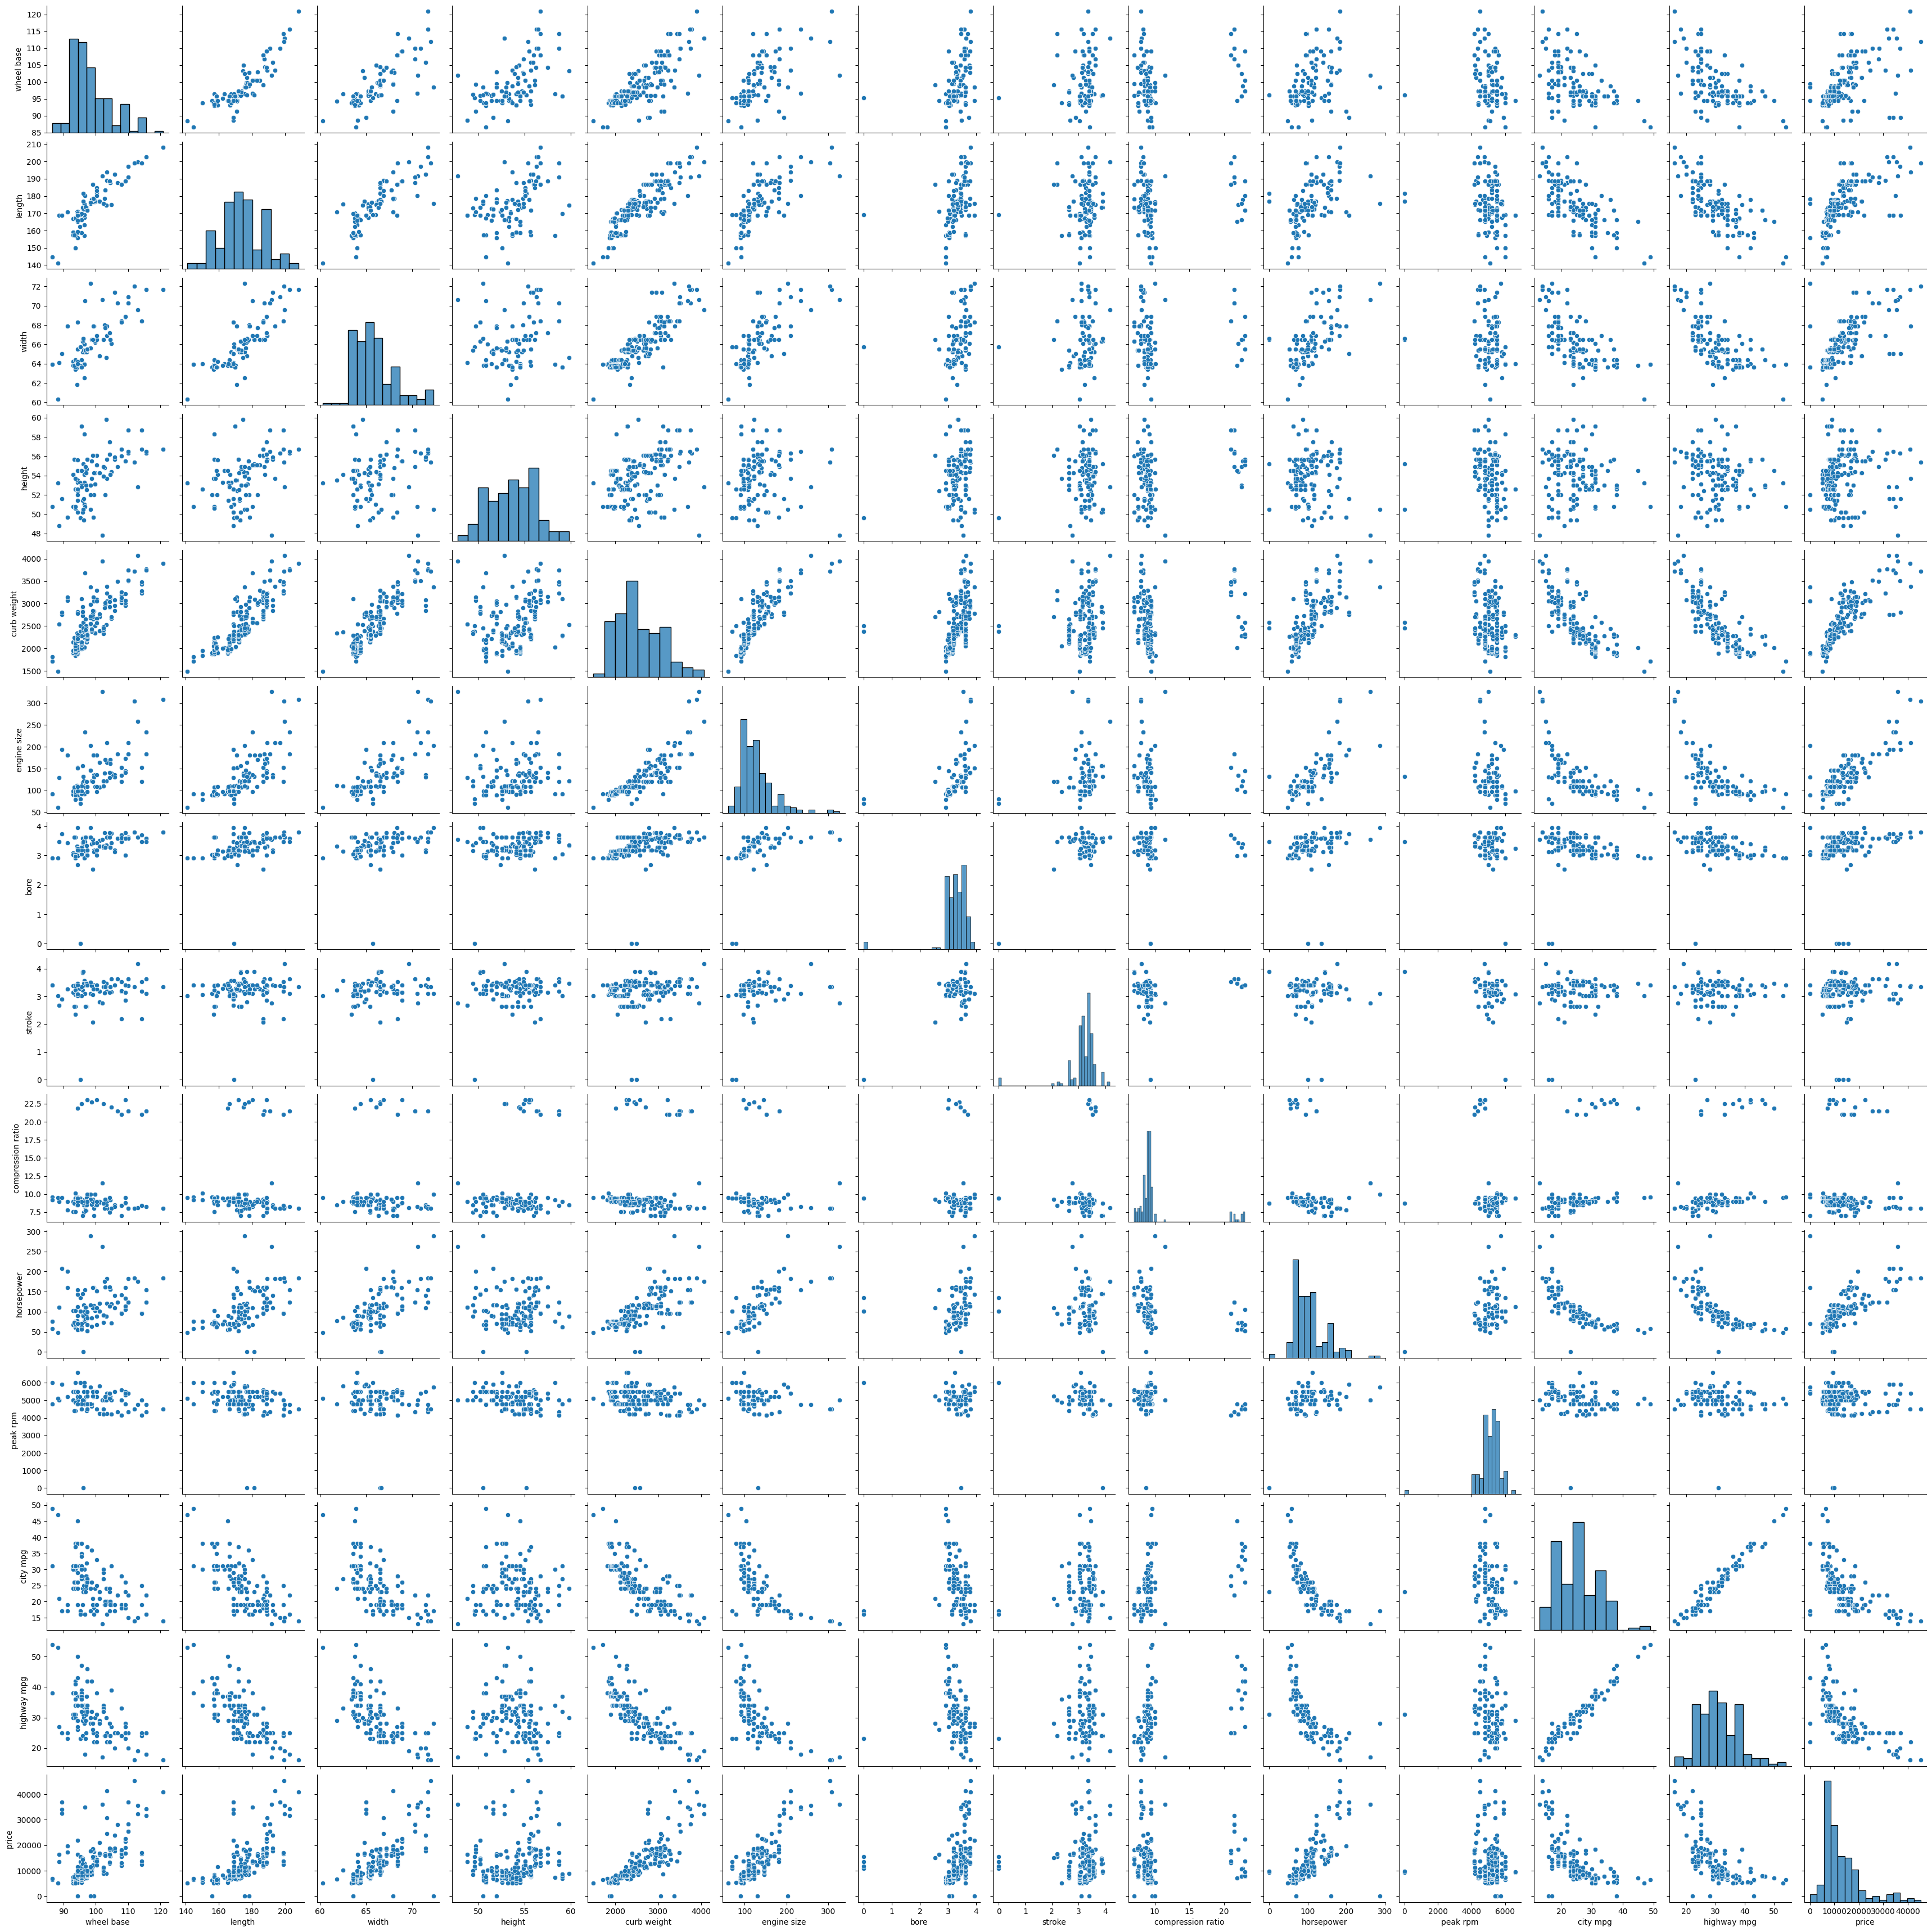

In [17]:
plt.figure(figsize=(16,16))
sns.pairplot(df_car_1[num_vars])
plt.show()

In [18]:
df_car_1.columns

Index(['fuel type', 'aspiration', 'doors', 'engine location', 'wheel base',
       'length', 'width', 'height', 'curb weight', 'engine size', 'bore',
       'stroke', 'compression ratio', 'horsepower', 'peak rpm', 'city mpg',
       'highway mpg', 'price', 'make(audi)', 'make(bmw)', 'make(chevrolet)',
       'make(dodge)', 'make(honda)', 'make(isuzu)', 'make(jaguar)',
       'make(mazda)', 'make(mercedes-benz)', 'make(mercury)',
       'make(mitsubishi)', 'make(nissan)', 'make(peugot)', 'make(plymouth)',
       'make(porsche)', 'make(renault)', 'make(saab)', 'make(subaru)',
       'make(toyota)', 'make(volkswagen)', 'make(volvo)', 'fuel system(2bbl)',
       'fuel system(4bbl)', 'fuel system(idi)', 'fuel system(mfi)',
       'fuel system(mpfi)', 'fuel system(spdi)', 'fuel system(spfi)',
       'cylinders(five)', 'cylinders(four)', 'cylinders(six)',
       'cylinders(three)', 'cylinders(twelve)', 'cylinders(two)',
       'engine type(dohcv)', 'engine type(l)', 'engine type(ohc)',
      

In [21]:
df_car_1['price'].corr(df_car_1['highway mpg'])

-0.6876750740856988

In [10]:
df_car_1.corr().head(50)

,fuel type,aspiration,doors,engine location,wheel base,length,width,height,curb weight,engine size,...,symboling(0),symboling(1),symboling(2),symboling(3),wheels(fwd),wheels(rwd),style(hardtop),style(hatchback),style(sedan),style(wagon)
fuel type,1.000000,0.401397,-0.181675,-0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,-0.069594,...,-0.156438,0.159302,0.005524,0.128056,0.090342,-0.122035,-0.018635,0.202093,-0.185623,-0.028183
aspiration,0.401397,1.000000,-0.046350,-0.057191,-0.257611,-0.234539,-0.300567,-0.087311,-0.324902,-0.108217,...,0.029547,0.079080,0.131943,-0.117276,0.145681,-0.112470,0.029074,-0.009786,-0.017111,-0.018908
doors,-0.181675,-0.046350,1.000000,0.138613,0.445696,0.393593,0.202072,0.547651,0.195683,0.017519,...,0.464914,-0.220685,-0.217149,-0.443285,0.034894,-0.075486,-0.229237,-0.612202,0.521878,0.331133
engine location,-0.040070,-0.057191,0.138613,1.000000,0.187790,0.050989,0.051698,0.106234,-0.050468,-0.196826,...,0.084915,0.072877,0.052413,-0.312905,0.144799,-0.158772,-0.394978,0.087754,0.114369,0.045417
wheel base,-0.308346,-0.257611,0.445696,0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,...,0.274072,-0.283085,-0.180357,-0.244038,-0.460355,0.498830,-0.008608,-0.386094,0.291086,0.210899
length,-0.212679,-0.234539,0.393593,0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,...,0.248857,-0.360253,-0.171755,-0.028868,-0.508714,0.538370,0.047292,-0.436269,0.269647,0.219683
width,-0.233880,-0.300567,0.202072,0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,...,0.106804,-0.240230,-0.163606,0.043742,-0.472116,0.511149,0.066360,-0.222308,0.154637,0.060639
height,-0.284631,-0.087311,0.547651,0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,...,0.301354,-0.223722,-0.035818,-0.415848,-0.100273,0.039814,-0.072328,-0.477476,0.235863,0.459148
curb weight,-0.217275,-0.324902,0.195683,-0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,...,0.205350,-0.377306,-0.183255,0.121437,-0.666039,0.669987,0.098956,-0.287501,0.099425,0.164075
engine size,-0.069594,-0.108217,0.017519,-0.196826,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,...,0.130234,-0.251389,-0.137191,0.134557,-0.518391,0.565509,0.239363,-0.216805,0.088459,-0.027518


In [27]:
num_vars

['wheel base',
 'length',
 'width',
 'height',
 'curb weight',
 'engine size',
 'bore',
 'stroke',
 'compression ratio',
 'horsepower',
 'peak rpm',
 'city mpg',
 'highway mpg',
 'price']

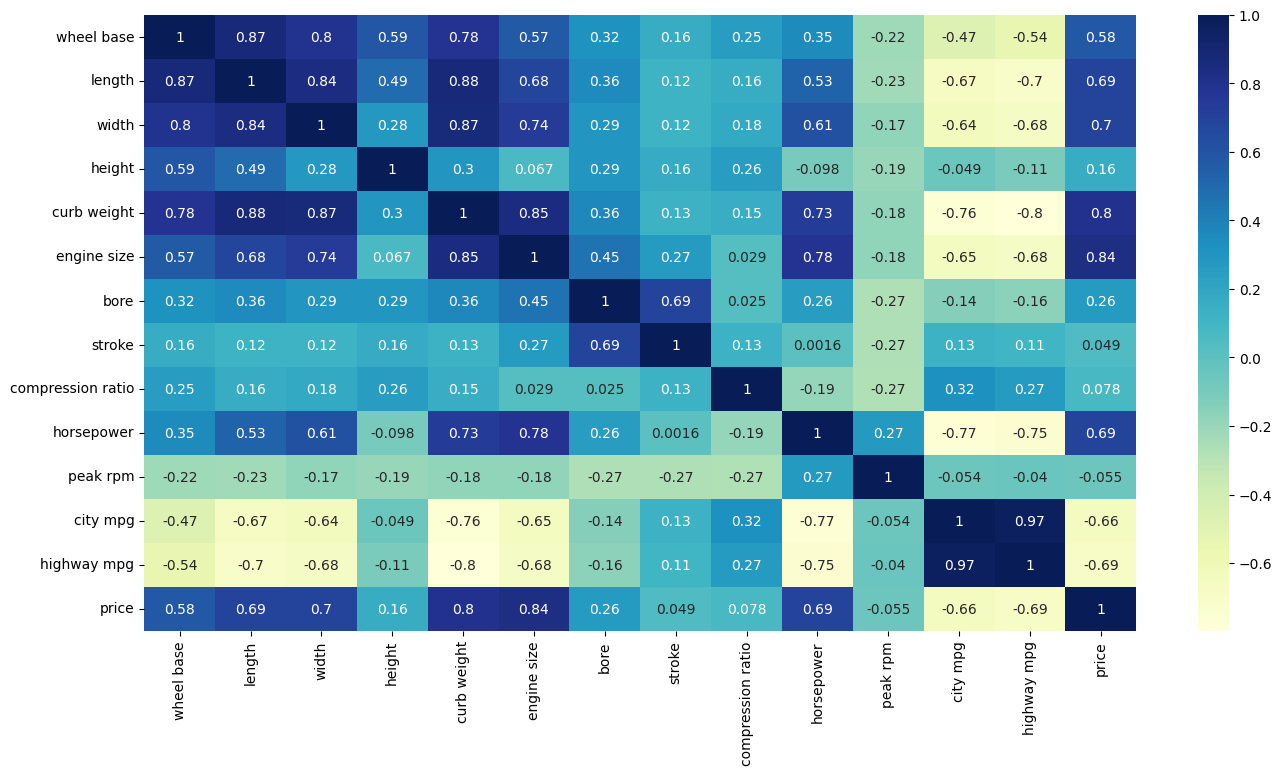

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df_car_1[num_vars].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [20]:
corr_matrix = df_car_1.corr()['price']
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.sort_values(by='price', ascending=False).head(20)

,index,price
17,price,1.000000
9,engine size,0.838097
8,curb weight,0.799773
6,width,0.695654
13,horsepower,0.691288
5,length,0.685019
64,wheels(rwd),0.623644
4,wheel base,0.578804
26,make(mercedes-benz),0.517527
43,fuel system(mpfi),0.488836


In [23]:
neg_vars = corr_matrix.sort_values(by='price', ascending=True).head(5)['index'].unique()

In [24]:
neg_vars

array(['highway mpg', 'city mpg', 'cylinders(four)', 'wheels(fwd)',
       'fuel system(2bbl)'], dtype=object)

In [ ]:
corr_matrix.sort_values(by='price', ascending=False).head(20)

In [26]:
corr_matrix.sort_values(by='price', ascending=False).head(20)['index'].unique()

array(['price', 'engine size', 'curb weight', 'width', 'horsepower',
       'length', 'wheels(rwd)', 'wheel base', 'make(mercedes-benz)',
       'fuel system(mpfi)', 'cylinders(six)', 'engine type(ohcv)',
       'make(bmw)', 'make(jaguar)', 'bore', 'make(porsche)',
       'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)'], dtype=object)

### Model Iteration - 1

In [27]:
var_1 = corr_matrix.sort_values(by='price', ascending=False).head(20)['index'].unique()


In [43]:
var_1

array(['price', 'engine size', 'curb weight', 'width', 'horsepower',
       'length', 'wheels(rwd)', 'wheel base', 'make(mercedes-benz)',
       'fuel system(mpfi)', 'cylinders(six)', 'engine type(ohcv)',
       'make(bmw)', 'make(jaguar)', 'bore', 'make(porsche)',
       'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)'], dtype=object)

In [17]:
df_car_itr_1 = df_car_1[var_1]

In [18]:
df_car_itr_1

,price,engine size,curb weight,width,horsepower,length,wheels(rwd),wheel base,make(mercedes-benz),fuel system(mpfi),cylinders(six),engine type(ohcv),make(bmw),make(jaguar),bore,make(porsche),style(hardtop),cylinders(five),symboling(3),cylinders(twelve)
0,13495.0,130,2548,64.1,111.0,168.8,1,88.6,0,1,0,0,0,0,3.47,0,0,0,1,0
1,16500.0,130,2548,64.1,111.0,168.8,1,88.6,0,1,0,0,0,0,3.47,0,0,0,1,0
2,16500.0,152,2823,65.5,154.0,171.2,1,94.5,0,1,1,1,0,0,2.68,0,0,0,0,0
3,13950.0,109,2337,66.2,102.0,176.6,0,99.8,0,1,0,0,0,0,3.19,0,0,0,0,0
4,17450.0,136,2824,66.4,115.0,176.6,0,99.4,0,1,0,0,0,0,3.19,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,141,2952,68.9,114.0,188.8,1,109.1,0,1,0,0,0,0,3.78,0,0,0,0,0
201,19045.0,141,3049,68.8,160.0,188.8,1,109.1,0,1,0,0,0,0,3.78,0,0,0,0,0
202,21485.0,173,3012,68.9,134.0,188.8,1,109.1,0,1,1,1,0,0,3.58,0,0,0,0,0
203,22470.0,145,3217,68.9,106.0,188.8,1,109.1,0,0,1,0,0,0,3.01,0,0,0,0,0


In [19]:
y = df_car_itr_1.pop('price')

In [20]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(df_car_itr_1, y)


In [51]:
y_train

114    17075.0
150     5348.0
17     36880.0
0      13495.0
87      9279.0
        ...   
107    11900.0
29     12964.0
168     9639.0
97      7999.0
72     35056.0
Name: price, Length: 153, dtype: float64

In [21]:
import statsmodels.api as sm

x_train_sm_1 = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_sm_1)
lr_model_1 = lr_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     36.16
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.42e-42
Time:                        06:50:40   Log-Likelihood:                -1461.6
No. Observations:                 153   AIC:                             2961.
Df Residuals:                     134   BIC:                             3019.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.028e+04   1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(df):

    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [23]:
getVIF(x_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
6,wheel base,2273.74
4,length,1804.69
2,width,1627.24
1,curb weight,315.22
0,engine size,141.45
13,bore,77.09
3,horsepower,30.17
5,wheels(rwd),4.53
10,engine type(ohcv),3.72
7,make(mercedes-benz),3.70


### Model Iteration - 2

In [25]:
var_2 = ['price', 'engine size', 'horsepower',
        'wheels(rwd)','make(mercedes-benz)',
       'fuel system(mpfi)', 'cylinders(six)', 'engine type(ohcv)',
       'make(bmw)', 'make(jaguar)', 'bore', 'make(porsche)',
       'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)']

In [24]:
df_car_1.columns

Index(['fuel type', 'aspiration', 'doors', 'engine location', 'wheel base',
       'length', 'width', 'height', 'curb weight', 'engine size', 'bore',
       'stroke', 'compression ratio', 'horsepower', 'peak rpm', 'city mpg',
       'highway mpg', 'price', 'make(audi)', 'make(bmw)', 'make(chevrolet)',
       'make(dodge)', 'make(honda)', 'make(isuzu)', 'make(jaguar)',
       'make(mazda)', 'make(mercedes-benz)', 'make(mercury)',
       'make(mitsubishi)', 'make(nissan)', 'make(peugot)', 'make(plymouth)',
       'make(porsche)', 'make(renault)', 'make(saab)', 'make(subaru)',
       'make(toyota)', 'make(volkswagen)', 'make(volvo)', 'fuel system(2bbl)',
       'fuel system(4bbl)', 'fuel system(idi)', 'fuel system(mfi)',
       'fuel system(mpfi)', 'fuel system(spdi)', 'fuel system(spfi)',
       'cylinders(five)', 'cylinders(four)', 'cylinders(six)',
       'cylinders(three)', 'cylinders(twelve)', 'cylinders(two)',
       'engine type(dohcv)', 'engine type(l)', 'engine type(ohc)',
      

In [26]:
df_car_itr_2 = df_car_1[var_2]

y = df_car_itr_2.pop('price')

x_train, x_test, y_train, y_test = train_test_split(df_car_itr_2, y)

x_train_sm_2 = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_sm_2)
lr_model_2  = lr_1.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     49.56
Date:                Fri, 09 May 2025   Prob (F-statistic):           9.83e-48
Time:                        07:44:12   Log-Likelihood:                -1456.0
No. Observations:                 153   AIC:                             2944.
Df Residuals:                     137   BIC:                             2992.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1253.3578   2

In [28]:
x_test.shape

(52, 15)

(52,)

In [33]:
x_test.shape

(52, 15)

In [32]:
lr_model_2

In [38]:
from sklearn.metrics import r2_score

X_test_sm = sm.add_constant(x_test)
y_test_pred = lr_model_2.predict(X_test_sm)

r_square = r2_score(y_test_pred, y_test)
print(r_square)


0.4304085640184059


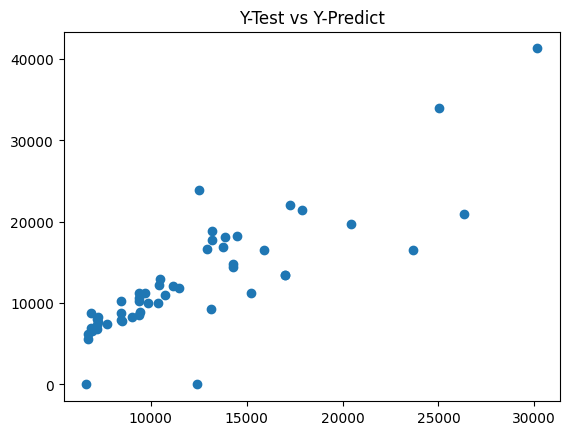

In [40]:
plt.scatter(y_test_pred, y_test)
plt.title('Y-Test vs Y-Predict')
plt.show()

###  Model Iteration - 3

In [ ]:
vars_10 = [

'price', 'engine size', 'curb weight', 'width', 'horsepower',
       'length', 'wheels(rwd)', 'wheel base', 'make(mercedes-benz)',
       'fuel system(mpfi)', 'cylinders(six)', 'engine type(ohcv)',
       'make(bmw)', 'make(jaguar)', 'bore', 'make(porsche)',
       'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)',
       'highway mpg', 'city mpg', 'cylinders(four)', 'wheels(fwd)',
       'fuel system(2bbl)'
]

In [31]:
df_car_itr_3_temp = df_car_1[vars_10]

In [32]:
df_car_itr_3_temp

,price,engine size,curb weight,width,horsepower,length,wheels(rwd),wheel base,make(mercedes-benz),fuel system(mpfi),...,make(porsche),style(hardtop),cylinders(five),symboling(3),cylinders(twelve),highway mpg,city mpg,cylinders(four),wheels(fwd),fuel system(2bbl)
0,13495.0,130,2548,64.1,111.0,168.8,1,88.6,0,1,...,0,0,0,1,0,27,21,1,0,0
1,16500.0,130,2548,64.1,111.0,168.8,1,88.6,0,1,...,0,0,0,1,0,27,21,1,0,0
2,16500.0,152,2823,65.5,154.0,171.2,1,94.5,0,1,...,0,0,0,0,0,26,19,0,0,0
3,13950.0,109,2337,66.2,102.0,176.6,0,99.8,0,1,...,0,0,0,0,0,30,24,1,1,0
4,17450.0,136,2824,66.4,115.0,176.6,0,99.4,0,1,...,0,0,1,0,0,22,18,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,141,2952,68.9,114.0,188.8,1,109.1,0,1,...,0,0,0,0,0,28,23,1,0,0
201,19045.0,141,3049,68.8,160.0,188.8,1,109.1,0,1,...,0,0,0,0,0,25,19,1,0,0
202,21485.0,173,3012,68.9,134.0,188.8,1,109.1,0,1,...,0,0,0,0,0,23,18,0,0,0
203,22470.0,145,3217,68.9,106.0,188.8,1,109.1,0,0,...,0,0,0,0,0,27,26,0,0,0


In [33]:
def remove_highly_correlated(df, threshold=0.6, target_column='price'):
    corr_matrix = df.corr().abs()

    # Create upper triangle matrix of correlations
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    # Find columns to drop
    to_drop = []
    for column in upper.columns:
        if any(upper[column] > threshold):
            # Don't drop the target column
            if column != target_column:
                to_drop.append(column)

    print(f"Variables dropped due to high correlation (> {threshold}): {to_drop}", end='\n')
    return df.drop(columns=to_drop)

In [35]:
remove_highly_correlated(df_car_itr_3_temp).columns

Variables dropped due to high correlation (> 0.6): ['engine size', 'curb weight', 'width', 'horsepower', 'length', 'wheels(rwd)', 'wheel base', 'highway mpg', 'city mpg', 'cylinders(four)', 'wheels(fwd)', 'fuel system(2bbl)']


Index(['price', 'make(mercedes-benz)', 'fuel system(mpfi)', 'cylinders(six)',
       'engine type(ohcv)', 'make(bmw)', 'make(jaguar)', 'bore',
       'make(porsche)', 'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)'],
      dtype='object')

In [36]:
vars_10 = ['price', 'make(mercedes-benz)', 'fuel system(mpfi)', 'cylinders(six)',
       'engine type(ohcv)', 'make(bmw)', 'make(jaguar)', 'bore',
       'make(porsche)', 'style(hardtop)', 'cylinders(five)', 'symboling(3)',
       'cylinders(twelve)']

In [41]:
max_bore = df_car_1['bore'].max()
min_bore = df_car_1['bore'].min()

In [42]:
max_bore

3.94

In [44]:
2.68/3.94

0.6802030456852792

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
df_car_itr_3 = df_car_1[vars_10]

In [66]:
to_transform = ['make(mercedes-benz)',
                'fuel system(mpfi)',
                'cylinders(six)',
                'engine type(ohcv)',
                'make(bmw)',
                'make(jaguar)',
                'bore',
                'make(porsche)',
                'style(hardtop)',
                'cylinders(five)',
                'symboling(3)',
                'cylinders(twelve)'
                ]

scaler = MinMaxScaler()
df_car_itr_3[to_transform] = scaler.fit_transform(df_car_itr_3[to_transform])

/var/folders/jr/pfy34jh93sb8cn2hnjc2k73w0000gn/T/ipykernel_24230/3541012039.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_itr_3[to_transform] = scaler.fit_transform(df_car_itr_3[to_transform])


In [67]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y = df_car_itr_3.pop('price')


In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_car_itr_3, y)
x_train_sm_3 = sm.add_constant(x_train)
lr_3 = sm.OLS(y_train, x_train_sm_3)
lr_model_3  = lr_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     43.17
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.08e-39
Time:                        07:53:29   Log-Likelihood:                -1486.1
No. Observations:                 153   AIC:                             2996.
Df Residuals:                     141   BIC:                             3032.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1680.0246   2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [74]:
getVIF(x_train)

,Features,VIF
1,fuel system(mpfi),2.61
3,engine type(ohcv),2.47
0,make(mercedes-benz),2.23
6,bore,2.15
2,cylinders(six),2.12
11,cylinders(twelve),2.07
5,make(jaguar),1.94
9,cylinders(five),1.55
4,make(bmw),1.46
10,symboling(3),1.29


In [80]:
from sklearn.metrics import r2_score

X_test_sm = sm.add_constant(x_test)
y_test_pred = lr_model_3.predict(X_test_sm)

r_square = r2_score(y_test_pred, y_test)
print(r_square)

0.6095613444248306


0.7710484696288785

In [85]:


for i in range(50):

    x_train, x_test, y_train, y_test = train_test_split(df_car_itr_3, y)
    x_train_sm_3 = sm.add_constant(x_train)
    lr_3 = sm.OLS(y_train, x_train_sm_3)
    lr_model_3  = lr_3.fit()
    # print(lr_model_3.summary())

    X_test_sm = sm.add_constant(x_test)
    y_test_pred = lr_model_3.predict(X_test_sm)

    r_square = r2_score(y_test_pred, y_test)

    print(f"======== Model Iteration - {i} =============")
    print('Training Accuracy:', lr_model_3.rsquared)
    print('Testing Accuracy: ', r_square)

    if lr_model_3.rsquared > 0.7 and r_square > 0.7:

        break


    print('-------------------------------------------')



======== Model Iteration - 0 =============
Training Accuracy: 0.770885506930189
Testing Accuracy:  0.5061681250443092
-------------------------------------------
======== Model Iteration - 1 =============
Training Accuracy: 0.7833975848143945
Testing Accuracy:  0.5511087440573639
-------------------------------------------
======== Model Iteration - 2 =============
Training Accuracy: 0.7338797687975699
Testing Accuracy:  0.8042428793409325


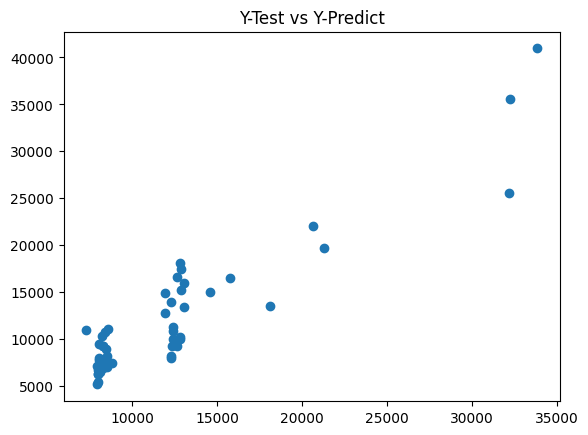

In [87]:
plt.scatter(y_test_pred, y_test)
plt.title('Y-Test vs Y-Predict')
plt.show()

In [86]:
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     32.17
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.15e-34
Time:                        08:04:23   Log-Likelihood:                -1498.3
No. Observations:                 153   AIC:                             3023.
Df Residuals:                     140   BIC:                             3062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4115.5446   2503.408      1.644      0.102    -833.828    9064.918
make(mercedes-benz)  2.283e+04   2615.095      8.731      0.000    1.77e+04     2.8e+04
fuel system(mpfi)    3996.4260    887.495      4.503      0.000    2241.800    5751.052
cylinders(six)       7599.8656   1631.307      4.659      0.000    4374.684    1.08e+04
engine type(ohcv)   -2036.5076   2259.139     -0.901      0.369   -6502.947    2429.932
make(bmw)            7791.3530   2104.073      3.703      0.000    3631.488     1.2e+04
make(jaguar)         1.182e+04   4844.648      2.440      0.016    2241.397    2.14e+04
bore                 5121.6055   3024.319      1.693      0.093    -857.635    1.11e+04
make(porsche)        4227.3905   2802.543      1.508      0.134   -1313.387    9768.168
style(hardtop)       1131.8392   1836.674      0.616      0.539   -2499.364    4763.042
cylinders(five)       593.4990   1948.608      0.305      0.761   -3259.003    4446.001
symboling(3)         3152.2661   1260.881      2.500      0.014     659.437    5645.095
cylinders(twelve)     1.35e+04   7268.918      1.858      0.065    -867.676    2.79e+04
==============================================================================
Omnibus:                       10.158   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               22.759
Skew:                           0.108   Prob(JB):                     1.14e-05
Kurtosis:                       4.877   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df_car_itr_3

,price,make(mercedes-benz),fuel system(mpfi),cylinders(six),engine type(ohcv),make(bmw),make(jaguar),bore,make(porsche),style(hardtop),cylinders(five),symboling(3),cylinders(twelve)
0,13495.0,0,1,0,0,0,0,3.47,0,0,0,1,0
1,16500.0,0,1,0,0,0,0,3.47,0,0,0,1,0
2,16500.0,0,1,1,1,0,0,2.68,0,0,0,0,0
3,13950.0,0,1,0,0,0,0,3.19,0,0,0,0,0
4,17450.0,0,1,0,0,0,0,3.19,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,0,1,0,0,0,0,3.78,0,0,0,0,0
201,19045.0,0,1,0,0,0,0,3.78,0,0,0,0,0
202,21485.0,0,1,1,1,0,0,3.58,0,0,0,0,0
203,22470.0,0,0,1,0,0,0,3.01,0,0,0,0,0
